In [4]:
import os
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Preprocessing des données
Contrairement à l'autre réutilisation https://github.com/AlexisEidelman/journaux_televises les données utilisées ici concernent le nombre de sujets traités (et non le temps par sujet), en substance cela mesure les mêmes informations. Egalement la normalisation est différente. Il ne s'agit pas de diviser chaque valeur par la colonne 'Totaux' qui correspond à la place d'un thème pour la somme de toutes les chaînes mais plutôt par la somme des sujets abordés par une seule chaîne pour un mois donné. En effet, l'une permet d'avoir une approche thématiques, tandis que l'autre permet de comparer chacune des chaînes de télévisions sans biais. Ainsi un journal de 15mn (Arte) peut être comparer à un journal de 40mn (TF1) ce qui n'était pas correctement le cas avant. 

Par conséquent les valeurs affichées représentent directement le pourcentage de chacune des thématiques abordés pour chacune des chaînes au cours de chaque mois de janvier 2005 à décembre 2017. Voir le notebook Normalisation pour savoir comment le dataframe df a été obtenu.

In [5]:
df=pd.read_pickle("./INA_normalized.pkl")

In [6]:
df

,MOIS,THEMATIQUES,TF1,France 2,France 3,Canal +,Arte,M6,Totaux
0,janv.-05,Catastrophes,0.303546,0.286787,0.225641,0.171429,0.157480,0.175627,1.320510
1,janv.-05,Culture-loisirs,0.038298,0.063063,0.089744,0.038095,0.000000,0.082437,0.311637
2,janv.-05,Economie,0.049645,0.027027,0.025641,0.009524,0.031496,0.039427,0.182760
3,janv.-05,Education,0.019858,0.018018,0.010256,0.028571,0.011811,0.028674,0.117189
4,janv.-05,Environnement,0.043972,0.037538,0.038462,0.009524,0.011811,0.035842,0.177148
5,janv.-05,Faits divers,0.034043,0.028529,0.023077,0.009524,0.003937,0.050179,0.149288
6,janv.-05,Histoire-hommages,0.051064,0.057057,0.061538,0.095238,0.090551,0.068100,0.423549
7,janv.-05,International,0.073759,0.091592,0.138462,0.142857,0.425197,0.093190,0.965056
8,janv.-05,Justice,0.028369,0.040541,0.041026,0.104762,0.043307,0.025090,0.283094
9,janv.-05,Politique France,0.038298,0.037538,0.064103,0.057143,0.086614,0.028674,0.312369


### Préparation des données pour la classification

On explique plus loin l'interêt d'aborder le sujet à l'aide d'algorithmes de Machine Learning pour la classification. Un format simple de mise en forme est d'avoir un tableau dont chacune des ligne représente un mois de JTs pour une chaîne x dont les caractéristiques (features) sont les thèmes et leur pourcentage de présence à l'antenne. On cherche donc à obtenir une matrice de dimension (930, 14) les 930 échantillons de mois pour 6 chaîne et les 14 thèmes caractéristiques. A cela il faut appairé correctement les chaînes de télévisions corréspondantes. On n'utilise pas de one-hot encoding, seulement un entier pour chaque chaîne suffit. (Hors exception les algorithmes ne considérerons pas de proximité entre les entiers). 

In [7]:
df_ml=df[['TF1','France 2', 'France 3', 'Canal +', 'Arte', 'M6']]

In [8]:
data_prep=np.array(df_ml[:2170])

##### Il s'agit de transformer correctement les dimensions de la matrice pour ne pas perdre l'ordre (TF1, FR2 ...M6) et  l'ordre des features (Catastrophes, ..... , Sport)

In [9]:
data_prep.shape

(2170, 6)

In [10]:
data_prep=data_prep.reshape((155,14,6))

In [11]:
data_prep=np.swapaxes(data_prep, 1, 2)

In [12]:
data_prep.shape

(155, 6, 14)

In [13]:
data=data_prep.reshape((155*6,14))

In [14]:
data[6]

array([0.05915493, 0.05774648, 0.06478873, 0.03802817, 0.06478873,
       0.02394366, 0.01971831, 0.14084507, 0.07887324, 0.03239437,
       0.07042254, 0.02394366, 0.24929577, 0.07605634])

##### Créer l'array des labels correspondant aux données

In [15]:
labels=np.tile(np.array([1,2,3,4,5,6]),155)

In [16]:
labels

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1,

##### On se retrouve donc avec une configuration parfaite pour pouvoir travailler sur les données. 
Un dataset de JTs de différentes chaîne de télévision de 14 features extraites par l'INA et leurs chaîne de diffusion associée.

In [17]:
data.shape

(930, 14)

In [18]:
labels.shape

(930,)

## Pourquoi faire du Machine Learning ? 
Cette approche va nous permettre de répondre notamment à deux questions très facilement et auxquelles une étude statistiques classique aussi approfondie soit-elle n'aurait pas permis de répondre. 
### Les journaux télévisés des différentes chaînes sont - ils reconnaissable à leur sujets de diffusions uniquement ? 
Cela se traduit en terme de Data Science par: Peut-on classifier les différentes chaînes de télévision les unes des autres en se basant sur les thèmes abordés par sujet ? 
### Y-a-t-il des thèmes permettant de discriminer les chaînes ? 
Si classification est possible, alors sur quels thèmes est elle basée ? 

### Résultats
Les algorithmes de machine learning ne sont pas détérministes ainsi à chaque execution du notebook les valeurs sont suceptibles de changer légèrement mais sans remettre en cause les analyses.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import svm
from mpl_toolkits.axes_grid1 import AxesGrid
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, KFold

In [20]:
class_names=['TF1', 'France 2', 'France 3', 'Canal + ', 'Arte', 'M6']

In [21]:
data=np.nan_to_num(data)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.15, random_state=42)

### Random Forest 
L'algorithme de Random Forest est basé sur un algorithme d'abre de décision. En particulier, c'est un des modèles les plus explicables du Machine Learning. Si la classification en soit apporte une réponse, comprendre la manière dont on a classifié donne encore plus d'inforamtions. Ainsi avec les arbres de décision il existe plusieurs outils pour comprendre la répartition des catégories dans les branches de l'arbre. Une indication simple est l'importance des features utilisées pour classifier. 

In [23]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

C:\Users\Flow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
y_pred=clf.predict(X_test)

In [25]:
y_test

array([1, 4, 1, 5, 1, 2, 6, 2, 4, 2, 3, 5, 2, 2, 3, 6, 1, 6, 2, 4, 5, 4,
       4, 5, 5, 4, 1, 5, 6, 5, 6, 2, 6, 6, 5, 2, 5, 1, 2, 5, 2, 4, 4, 1,
       1, 5, 6, 6, 4, 3, 6, 5, 6, 5, 2, 3, 6, 4, 6, 3, 1, 3, 4, 3, 3, 1,
       1, 1, 3, 6, 4, 5, 3, 6, 1, 3, 3, 6, 3, 2, 5, 4, 1, 6, 5, 4, 4, 3,
       2, 6, 3, 5, 3, 1, 3, 4, 4, 5, 4, 1, 1, 5, 6, 1, 4, 2, 2, 4, 4, 4,
       4, 4, 5, 3, 3, 1, 4, 2, 5, 6, 2, 2, 2, 1, 4, 1, 5, 5, 3, 2, 3, 1,
       4, 1, 6, 3, 1, 1, 6, 2])

In [26]:
y_pred

array([1, 4, 1, 5, 1, 6, 6, 3, 4, 2, 1, 5, 2, 2, 6, 6, 1, 6, 4, 4, 5, 4,
       4, 5, 5, 4, 2, 5, 6, 5, 4, 1, 6, 6, 5, 6, 5, 1, 1, 5, 2, 6, 4, 2,
       2, 5, 6, 6, 4, 3, 6, 5, 3, 5, 1, 2, 4, 4, 6, 2, 1, 6, 4, 4, 6, 3,
       2, 3, 6, 6, 4, 5, 4, 6, 1, 4, 1, 6, 3, 4, 5, 4, 1, 6, 5, 4, 4, 1,
       1, 6, 3, 5, 6, 1, 1, 4, 4, 5, 4, 2, 1, 5, 6, 2, 4, 2, 2, 4, 4, 4,
       4, 4, 5, 4, 2, 1, 2, 3, 5, 2, 1, 1, 1, 6, 4, 2, 5, 5, 6, 3, 4, 1,
       4, 4, 3, 6, 6, 1, 6, 3])

On ne s'interesse pas particulièrement à ce résultat ici on veut juste avoir quelquechose de 'suffisant' ce qui est très correct pour du mutli-class. Cela permet de répondre Oui en partie à la première question. 

In [28]:
print('Accuracy= ', np.count_nonzero(y_test-y_pred==0)/len(y_pred)) 

Accuracy=  0.6214285714285714


Feature ranking:
1. feature 7 (0.254954)
2. feature 13 (0.165570)
3. feature 5 (0.121992)
4. feature 1 (0.108901)
5. feature 4 (0.073895)
6. feature 8 (0.070346)
7. feature 3 (0.049231)
8. feature 12 (0.030572)
9. feature 9 (0.030367)
10. feature 0 (0.024985)
11. feature 2 (0.022516)
12. feature 6 (0.019762)
13. feature 11 (0.015323)
14. feature 10 (0.011587)


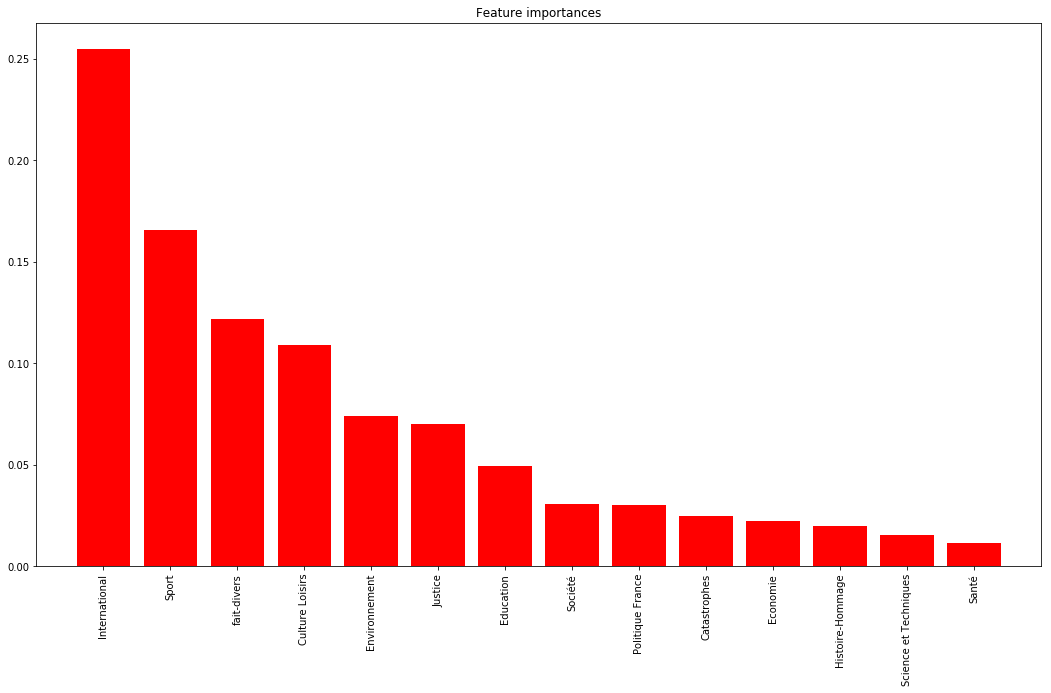

In [157]:
feature_list=['Catastrophes','Culture Loisirs','Economie' ,'Education','Environnement' , \
              'fait-divers', 'Histoire-Hommage', 'International', 'Justice',  'Politique France', \
              'Santé', 'Science et Techniques', 'Société',  'Sport']
importances = clf.feature_importances_
# Print the feature ranking
print("Feature ranking:")
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
feature_list = [feature_list[i] for i in indices]
plt.figure(figsize=(18,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]),feature_list, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Réponse: Y-a-t-il des thèmes permettant de discriminer les chaînes ?
Oui, d'abord la section International apparaît en premier, cela est dû de manière évidente à la présence de la chaîne arte dans la classification pour laquelle le thème International est toujours plus présent que dans n'importe quel autre journal. On retrouve cette caractéristique dans d'autres réalisations et avec des analyses simples. 
On remarque aussi que les thèmes de Sport, Fait-divers et Culture-Loisirs permettent assez bien de séparer les chaînes entre-elles.  En revanche pour les thèmes de polique en France, Economie, Catastrophe, Histoire-Hommage et Science Techniques et Santé on voit qu'ils n'influent pas beaucoup la classification. Cela est dû sans doute pour la plupart des thèmes à leur présence sous forme d'évènements ponctuels. Une éléction, une réforme économique, une catastrophe ou les jours fériés de mémoire nationale apppartenant respectivement aux sujets évoqués et n'étant pas caractéristique de la programmation régulière d'un journal. En revanche on n'explique pas pouquoi le sujet de la Santé ou des Sciences est si peu discriminant. 

### KNN
On essaye l'algorithme des plus proche voisin car il est pertinent du point de vue de cette classification. En effet pour peu qu'un journal respecte un certain format type de présentation l'algorithme des PPV va assez simplement retrouver un 'mois semblables' proche de lui et lui attribuer la bonne catégorie. 

In [30]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Code from scikit-learn
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [31]:
# Fitting K-nearest neighbour
print("Fitting K-nearest neighbour to the training set")
t0 = time()
p_grid_KNN = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
KNN = KNeighborsClassifier()
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Nested CV with parameter optimization
clf = GridSearchCV(estimator=KNN, param_grid=p_grid_KNN, cv=inner_cv)
nested_score = cross_val_score(clf, X_test, y_test, cv=outer_cv)
print("done in %0.3fs" % (time() - t0))
print(nested_score)
print("Average and std Nested Cv score : {0} +- {1}".format(nested_score.mean(), nested_score.std() ))


Fitting K-nearest neighbour to the training set
done in 1.427s
[0.60714286 0.46428571 0.57142857 0.42857143 0.42857143]
Average and std Nested Cv score : 0.4999999999999999 +- 0.07491491772643939


Best training Score: 0.5658227848101266
Best training params: {'n_neighbors': 9}
Normalized confusion matrix
[[0.4        0.36       0.16       0.         0.         0.08      ]
 [0.33333333 0.38095238 0.14285714 0.04761905 0.         0.0952381 ]
 [0.04545455 0.40909091 0.31818182 0.09090909 0.         0.13636364]
 [0.07407407 0.25925926 0.14814815 0.51851852 0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.36363636 0.04545455 0.         0.04545455 0.         0.54545455]]


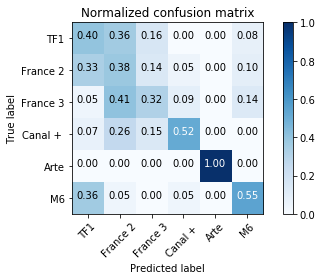

In [32]:
# Looking for the best hyperparameters
grid_KNN = GridSearchCV(estimator=KNN, param_grid=p_grid_KNN, scoring="accuracy", cv=5)
grid_KNN.fit(X_train, y_train)
print("Best training Score: {}".format(grid_KNN.best_score_))
print("Best training params: {}".format(grid_KNN.best_params_))
y_pred = grid_KNN.predict(X_test)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

### Quelles JTs se ressemblent ? 
D'abord, on confirme bien que l'excellent Journal d'Arte ne ressemble pas aux autres et qu'il est toujours correctement classifié. S'en suivent les journaux télévisés aux formats plus atypiques comme sur Canal+ et M6 qui sont classifiés correctement la plupart du temps. Il est intéressant de remarquer que le journal de M6 est assez souvent comparé à tort à celui de TF1 mais à aucun autre (quasiment). Au contraire celui de Canal semble se rapprocher plus de ceux du service public. Pour ce qui est des deux grands journaux historiques nationaux TF1 et France 2 on observe que malgré les appartenances public/privés historiques il sont difficilement discernable. On retire dejà un premier point de cette analyse: 
- Le financement (public/privé) d'une chaîne n'influe pas les thèmes abordés au JT. 

On peut détécter aussi d'autre éléments, le journal de France 3 est plus volatile, peut-être que la programmation des thèmes est moins régulière car c'est celui pour lequel il y a le plus de variance dans les classifications proposés (et le plus d'erreur de classification). Avec à noté, une fort taux de confusion avec sa chaîne jumelle France 2.  

### Non Linear SVM
Les méthodes non linéaires vont permettre une distinction plus précises des zones mais avec une explicabilité plus complexe. Néamoins cela permet de fixer un seuil de séparation plus performant pour différencier les chaînes. 

In [33]:
# Fitting Non-linear SVM
print("Fitting Non-linear SVM to the training set")
t0 = time()
p_grid_nlsvm = {'C': [1e-1,1,2,3,4,5,6,7,8,9,1e1,20,30],
              'gamma': [0.001, 0.005, 0.01, 0.1, 0.2, 1, 10, 20, 100, 1000], }
NLsvm = SVC(kernel='rbf', class_weight='balanced')
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Nested CV with parameter optimization
clf = GridSearchCV(estimator=NLsvm, param_grid=p_grid_nlsvm, cv=inner_cv)
nested_score = cross_val_score(clf, X_test, y_test, cv=outer_cv)
print("done in %0.3fs" % (time() - t0))
print("Average and std Nested Cv score : {0} +- {1}".format(nested_score.mean(), nested_score.std() ))

# Looking for the best hyperparameters
grid_nlsvm = GridSearchCV(estimator=NLsvm, param_grid=p_grid_nlsvm, scoring="balanced_accuracy", cv=5)
grid_nlsvm.fit(X_train, y_train)
print("Best Score: {}".format(grid_nlsvm.best_score_))
print("Best params: {}".format(grid_nlsvm.best_params_))


Fitting Non-linear SVM to the training set
done in 8.681s
Average and std Nested Cv score : 0.6071428571428571 +- 0.08748177652797065
Best Score: 0.6857705410701191
Best params: {'C': 7, 'gamma': 10}


Les valeurs de C et gamma pour le grid search sont un peu élevées il y a peut-être un peu d'overfitting. 

Normalized confusion matrix
[[0.32       0.52       0.16       0.         0.         0.        ]
 [0.28571429 0.38095238 0.14285714 0.0952381  0.         0.0952381 ]
 [0.04545455 0.18181818 0.59090909 0.09090909 0.         0.09090909]
 [0.         0.11111111 0.07407407 0.77777778 0.         0.03703704]
 [0.         0.         0.         0.         1.         0.        ]
 [0.13636364 0.04545455 0.04545455 0.09090909 0.         0.68181818]]


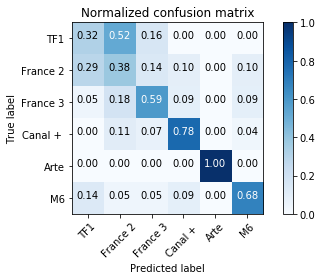

In [34]:
y_pred = grid_nlsvm.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

### Mêmes conclusions ?
##### La classification est plus performante mais les confusions portent sur les mêmes chaînes. 
* D'abord sur les "confusions", malgré le fait que l'espace ait été 'découpé de manière non linéaire' par la SVM les confusions de chaînes restent à peu près les mêmes. Cela confirme que les contenus sont effectivement proches en terme de sujets abordées et que la porximité de certains journaux est très robuste. En particulier il est toujours très intéressant de voir que France 2 et TF1 sont presque indiscernables.
* Ensuite sur la précision de la classification, on arrive maintenant à detecter correctement les journaux provenant de Canal et M6 et même une avancé significative pour France 3 toujours fortement pénalisé par sa proximité au journal de France 2. 

## Conclusion
L'outil algorithmique permet des analyses fortes et globales. Lorsqu'il est explicable il permet en plus de comprendre les différences entre les JT. On se souvient aussi que toutes ces analyses sont basées sur les caractéristiques extraites tel que présenté ici : http://www.inatheque.fr/publications-evenements/ina-stat/ina-stat-methodologie.html . Ainsi à chaque phrase de conclusion il faut rajouter "en terme de pourcentage de sujets abordés par rapport aux thématiques détérminées par l'INA". On tire des résultats précédents quelques conslusions: 
* Arte est la seule chaîne proposant un journal radicalement différent. 
* Les journaux de groupe public ou privés ont des contenus similaires. 
* Les journaux de France 2 et TF1 sont très proches. 
* Les JTs sont généralement discernables uniquement par les thèmes qu'ils abordent et en sont une caractéristique qui semble pérenne et consistante au cours des 12 années d'étude (12 ans tout de même!). 
* Les thèmes les plus discriminants sont l'International (fort biais dû à Arte), le Sport et la Culture.
* Les thèmes les moins discriminants sont ceux ayant une marque temporelle précise (Hommages, Catastrophes, Politique..)

On rapelle bien sûr que le journalisme est un art complexe et ne se limite pas au "sujet abordé". Deux JT pourrait avoir exactement les mêmes sujets tous les jours et des regards littéralement opposés. 

### Attention aux conclusions rapides: un exemple avec un article "Le Monde".

Enfin, dans des registres plus polémiques on remarques ce genre de propos : "Les JT sont devenus nuls", "La télé ne parle que de catastrophes" etc.. de beaux exemples ici: https://www.lemonde.fr/actualite-medias/article/2013/06/17/en-dix-ans-le-nombre-de-faits-divers-dans-les-jt-a-augmente-de-73_3431764_3236.html?contributions. Et l'article correspondant : https://www.lemonde.fr/actualite-medias/article/2013/06/17/en-dix-ans-le-nombre-de-faits-divers-dans-les-jt-a-augmente-de-73_3431764_3236.html. Un petit mot également sur ce genre d'article qui sont à mon sens dangereux. Avec l'afflux des données les journaux utilisent de plus en plus des chiffres pour décrire des phénomènes là où la population et bien souvent les gens qui les proposent ne comprennte pas complétement ce qu'ils signifient et n'en font qu'un étude partielle. L'article en question se base sur le même set de données (commence en 2002 3 années plus tôt cependant) que nous et sélectionne une unique caractéristique pour en faire un article 'sensation'. Ce genre d'attitude ammène évidemment une forte intéraction de la part du lecteur (voir les commentaires) mais ne constitue pas une analyse de qualité. Ainsi pour répondre à certains éléments polémiques, la classification réussie avec un mélange aléatoire sur les données des 12 années précedentes (train-test/split) montre un forte constance dans les thèmes et sujets de chacun des journaux. Si l'article nous fait croire que les fait divers on augmenté de 72% cela ne semble être dû qu'à une saisonalité. Si une tendance a existé avec un pic justement au moment de la parution de l'article depuis 2013 cette tendance n'a céssé de décroître depuis. 

In [39]:
df_theme=df.loc[df['THEMATIQUES'] == 'Faits divers']

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Les phénomènes de faits divers sont évidemments liés à des évenements ponctuels et on voit bien sur le graphique les nombreux pics, alors même que par définition de la donnée d'entrée les informations sont moyénnées déjà sur 30 jours. En moyennant fortement il est vrai que l'on observe une augmentation du nombre de fait divers à la télé (par rapport au niveau usuel) sans toutefois prendre une part prépondérante des JTs. Une augmentation de 100% paraît choquante (ça a doublé!) mais présenter l'information de la manière suivante: 'le thème abordé est passé de 2% à 4% des sujets totaux présentés' et vous n'avez plus de scoop. On remarque d'ailleurs que ces dernières années la porportion a baissé. Rien d'alarmant en somme. Paradoxal comme un journal juge d'autres journaux sur leur qualité et se méprend à son propre jeu.

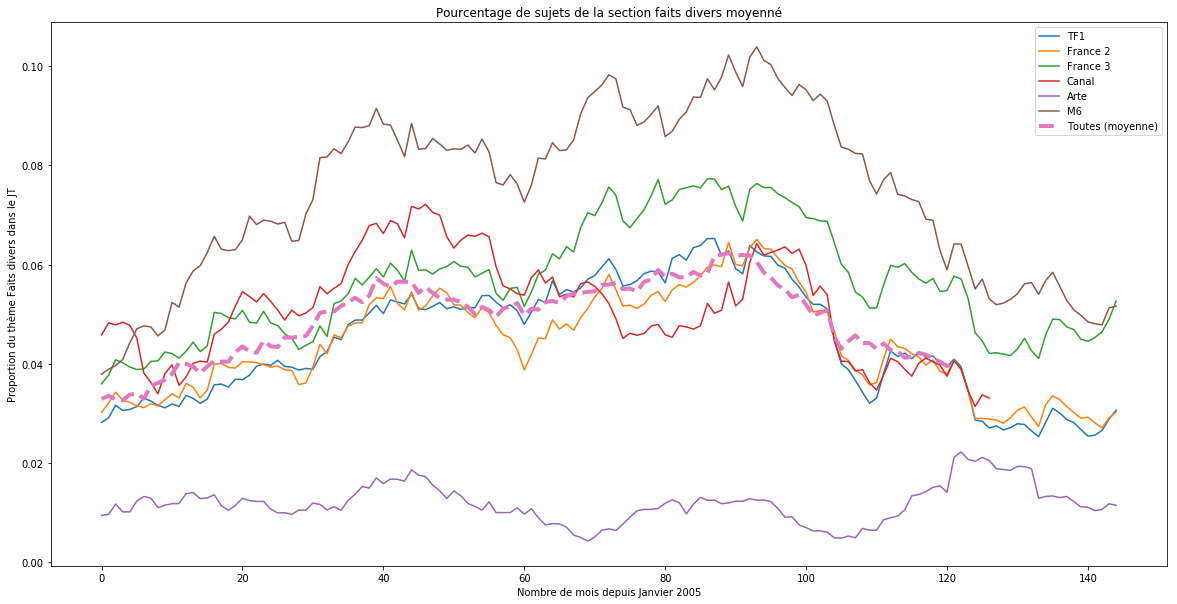

In [61]:
idx_deb=0
idx_fin = 180
w=12

theme_1=df_theme['TF1'].to_numpy()
theme2=df_theme['France 2'].to_numpy()
theme3=df_theme['France 3'].to_numpy()
theme4=df_theme['Canal +'].to_numpy()
theme5=df_theme['Arte'].to_numpy()
theme6=df_theme['M6'].to_numpy()
total=(theme_1+ theme2+ theme3+ theme4+ theme5+ theme6)/6
plt.figure(figsize=(20,10))
plt.plot(moving_average(theme_1[idx_deb: idx_fin],w), label='TF1')
plt.plot(moving_average(theme2[idx_deb: idx_fin],w), label='France 2')
plt.plot(moving_average(theme3[idx_deb: idx_fin],w), label='France 3')
plt.plot(moving_average(theme4[idx_deb: idx_fin],w), label='Canal')
plt.plot(moving_average(theme5[idx_deb: idx_fin],w), label='Arte')
plt.plot(moving_average(theme6[idx_deb:idx_fin],w), label='M6')
plt.plot(moving_average(total[idx_deb:idx_fin],w+5), label='Toutes (moyenne)', linewidth=4, linestyle='dashed')
plt.title('Pourcentage de sujets de la section faits divers moyenné')
plt.xlabel('Nombre de mois depuis Janvier 2005')
plt.ylabel('Proportion du thème Faits divers dans le JT')
plt.legend()

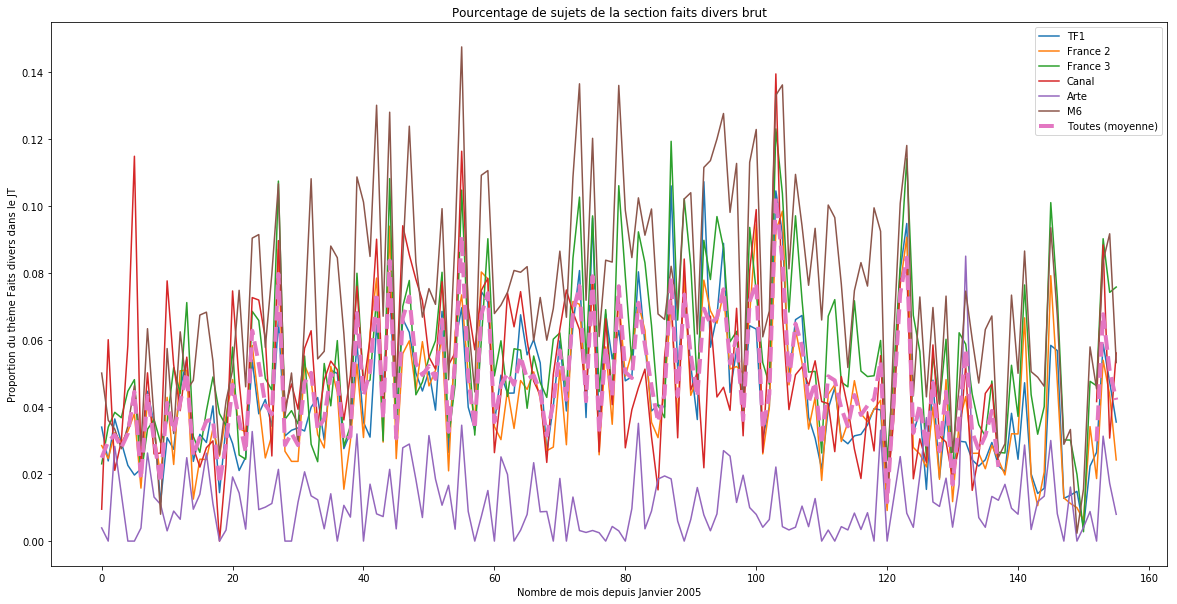

In [58]:
idx_deb=0
idx_fin = 180
w=1

theme_1=df_theme['TF1'].to_numpy()
theme2=df_theme['France 2'].to_numpy()
theme3=df_theme['France 3'].to_numpy()
theme4=df_theme['Canal +'].to_numpy()
theme5=df_theme['Arte'].to_numpy()
theme6=df_theme['M6'].to_numpy()
total=(theme_1+ theme2+ theme3+ theme4+ theme5+ theme6)/6
plt.figure(figsize=(20,10))
plt.plot(moving_average(theme_1[idx_deb: idx_fin],w), label='TF1')
plt.plot(moving_average(theme2[idx_deb: idx_fin],w), label='France 2')
plt.plot(moving_average(theme3[idx_deb: idx_fin],w), label='France 3')
plt.plot(moving_average(theme4[idx_deb: idx_fin],w), label='Canal')
plt.plot(moving_average(theme5[idx_deb: idx_fin],w), label='Arte')
plt.plot(moving_average(theme6[idx_deb:idx_fin],w), label='M6')
plt.plot(moving_average(total[idx_deb:idx_fin],w), label='Toutes (moyenne)', linewidth=4, linestyle='dashed')
plt.title('Pourcentage de sujets de la section faits divers brut')
plt.xlabel('Nombre de mois depuis Janvier 2005')
plt.ylabel('Proportion du thème Faits divers dans le JT')
plt.legend()

#### Pour la partie du journal qui traite de l'analyse entre les chaînes il est vrai que M6 (11%) et Arte (2%) se démarquent
L'article reste factuel mais il faut faire attention en présentant les chiffres et attention à ceux à quoi les gens retiennent. La partie sur les disparités entre chaînes reste pertinente.  

In [37]:
thematiques=[]
for column in df[['TF1', 'France 2', 'France 3', 'Canal +', 'Arte', 'M6']]:
    thematiques.append(df.groupby(['THEMATIQUES'])[column].sum())
print(thematiques)

[THEMATIQUES
Catastrophes              11.115376
Culture-loisirs           12.993178
Economie                  15.284479
Education                  4.087299
Environnement              8.347971
Faits divers               6.787775
Histoire-hommages          3.554200
International             18.182928
Justice                    7.460552
Politique France          14.807943
Santé                      6.284787
Sciences et techniques     3.910444
Société                   28.840632
Sport                     14.404292
Name: TF1, dtype: float64, THEMATIQUES
Catastrophes              10.857106
Culture-loisirs           10.946643
Economie                  15.804885
Education                  3.311422
Environnement              7.237739
Faits divers               6.702807
Histoire-hommages          3.594358
International             23.791328
Justice                    7.718934
Politique France          16.713500
Santé                      5.722151
Sciences et techniques     2.964482
Société     

#### Ces commentaires n'engagent que moi et sont une analyse du jeu de données proposés.  
Pour toute remarque n'hesitez pas à submit des issues, fork etc.. ou à m'écrire flaborde@enst.fr 